## Preparation of the Data

1 - Input missing values "0" coordinates
2 - Smoothing of the movements
3 - Max-min normalization vs relative coordinates

Split the data in train and validation sets for the modeling


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import the data
PATH_DATA = "Data_Original/Data_concat_cut.csv"
data = pd.read_csv(PATH_DATA)
data.head()
print(data.shape) 
data[data["status"]=="S"]

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Original/Data_concat_cut.csv'

In [3]:
#Add column for the figure ID
#Figure ID is used to to do shuffle between the figures keeping the frames that belong to one figure together


ind_start = data[data['status'] == "S"].index.tolist()
ind_end = data[data['status'] == "E"].index.tolist()

def get_id(row_ind):
    l_bound = np.array(ind_start) <= row_ind
    h_bound = np.array(ind_end) >= row_ind
        
    intersect = np.where(l_bound * h_bound)
    return intersect[0][0]

data = data.assign(figure_id=lambda x: x.index)
data['figure_id'] = data['figure_id'].map(lambda row: get_id(row))


In [4]:
data.head()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Artur_05122021_chreo1,250,0.0,249.061,196.239,251.496,286.575,168.695,284.129,126.032,...,0.947265,0.790894,0.773175,0.647946,0.812466,0.850178,0.733774,basic,S,0
1,1p_Artur_05122021_chreo1,251,0.0,251.454,193.828,253.934,286.640,171.081,286.549,128.490,...,0.921918,0.806627,0.771766,0.630645,0.804178,0.840649,0.729915,basic,NaN,0
2,1p_Artur_05122021_chreo1,252,0.0,251.543,193.853,256.475,286.643,171.284,286.523,130.914,...,0.943283,0.803007,0.774799,0.633506,0.810073,0.833977,0.715198,basic,NaN,0
3,1p_Artur_05122021_chreo1,253,0.0,251.599,193.823,256.469,289.012,171.270,286.601,130.954,...,0.928143,0.802044,0.771636,0.628547,0.823398,0.837598,0.705927,basic,NaN,0
4,1p_Artur_05122021_chreo1,254,0.0,254.001,193.773,256.494,288.984,173.675,286.574,131.010,...,0.914674,0.800491,0.774978,0.627601,0.828413,0.841520,0.700943,basic,NaN,0


In [5]:
data.columns

Index(['clip_name', 'frame_nr', 'person_id', 'nose_x', 'nose_y', 'neck_x',
       'neck_y', 'rshoulder_x', 'rshoulder_y', 'relbow_x', 'relbow_y',
       'rwrist_x', 'rwrist_y', 'lshoulder_x', 'lshoulder_y', 'lelbow_x',
       'lelbow_y', 'lwrist_x', 'lwrist_y', 'midhip_x', 'midhip_y', 'rhip_x',
       'rhip_y', 'rknee_x', 'rknee_y', 'rankle_x', 'rankle_y', 'lhip_x',
       'lhip_y', 'lknee_x', 'lknee_y', 'lankle_x', 'lankle_y', 'reye_x',
       'reye_y', 'leye_x', 'leye_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y',
       'lbigtoe_x', 'lbigtoe_y', 'lsmalltoe_x', 'lsmalltoe_y', 'lheal_x',
       'lheal_y', 'rbigtoe_x', 'rbigtoe_y', 'rsmalltoe_x', 'rsmalltoe_y',
       'rheal_x', 'rheal_y', 'nose_v', 'neck_v', 'rshoulder_v', 'relbow_v',
       'rwrist_v', 'lshoulder_v', 'lelbow_v', 'lwrist_v', 'midhip_v', 'rhip_v',
       'rknee_v', 'rankle_v', 'lhip_v', 'lknee_v', 'lankle_v', 'reye_v',
       'leye_v', 'rear_v', 'lear_v', 'lbigtoe_v', 'lsmalltoe_v', 'lheal_v',
       'rbigtoe_v', 'rsmallt

## Imputing missing values

For every column get the points of 0 values and interpolates from these ends

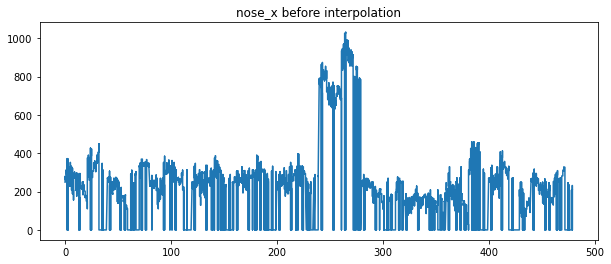

In [5]:
# example before interpolation
plt.figure(figsize=(10,4))
plt.plot(data["nose_x"])
plt.title("nose_x before interpolation")
plt.show()


In [6]:
# Replace "0" by NaN in with numpy
# Then, use pandas to do linear interpolat0ion of NaN values

cols = ['nose_x', 'nose_y', 'neck_x',
       'neck_y', 'rshoulder_x', 'rshoulder_y', 'relbow_x', 'relbow_y',
       'rwrist_x', 'rwrist_y', 'lshoulder_x', 'lshoulder_y', 'lelbow_x',
       'lelbow_y', 'lwrist_x', 'lwrist_y', 'midhip_x', 'midhip_y', 'rhip_x',
       'rhip_y', 'rknee_x', 'rknee_y', 'rankle_x', 'rankle_y', 'lhip_x',
       'lhip_y', 'lknee_x', 'lknee_y', 'lankle_x', 'lankle_y', 'reye_x',
       'reye_y', 'leye_x', 'leye_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y',
       'lbigtoe_x', 'lbigtoe_y', 'lsmalltoe_x', 'lsmalltoe_y', 'lheal_x',
       'lheal_y', 'rbigtoe_x', 'rbigtoe_y', 'rsmalltoe_x', 'rsmalltoe_y',
       'rheal_x', 'rheal_y']

data[cols] = data[cols].replace({0.:np.nan})
data.interpolate(method='linear', columns=cols, inplace=True)

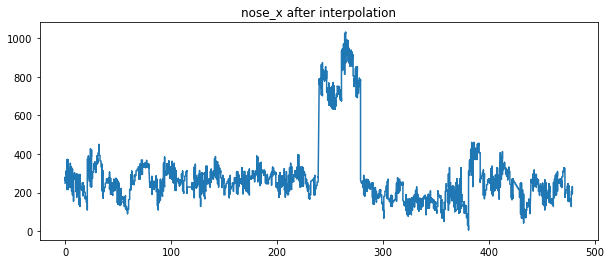

In [7]:
# example after interpolation
plt.figure(figsize=(10,4))
plt.plot(data["nose_x"])
plt.title("nose_x after interpolation")
plt.show()

In [19]:
data.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
44447,1p_Stef_2_05122021_Choreo1,3708,0.0,196.278,306.630,238.933,349.283,251.569,349.249,268.999,...,0.898602,0.796509,0.799244,0.720383,0.325526,0.323599,0.373564,suzie-q,NaN,479
44448,1p_Stef_2_05122021_Choreo1,3709,0.0,201.309,306.672,243.935,349.281,251.462,346.850,256.488,...,0.937453,0.602083,0.599544,0.725530,0.616891,0.591275,0.367217,suzie-q,NaN,479
44449,1p_Stef_2_05122021_Choreo1,3710,0.0,206.206,306.717,246.470,346.881,249.026,346.807,259.009,...,0.958437,0.708810,0.654566,0.761363,0.845238,0.790193,0.405285,suzie-q,NaN,479
44450,1p_Stef_2_05122021_Choreo1,3711,0.0,208.661,309.062,248.885,346.841,248.887,346.802,253.987,...,0.973175,0.708356,0.714142,0.680468,0.840614,0.726000,0.722980,suzie-q,NaN,479
44451,1p_Stef_2_05122021_Choreo1,3712,0.0,208.699,309.074,249.067,346.829,248.943,346.772,259.013,...,0.973770,0.803625,0.826172,0.803299,0.814626,0.701920,0.751281,suzie-q,E,479


## Smoothing by "clip_name"

The smoothing is applied separately to every column of a sub-data frame corresponding to each "clip name" 

Number of frames for this video is 3680


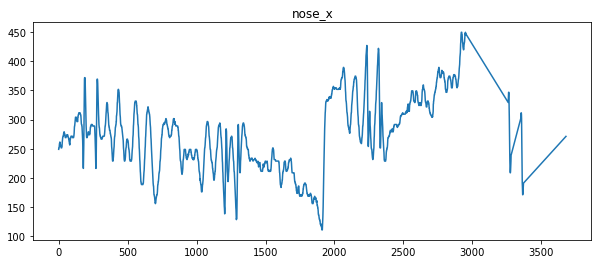

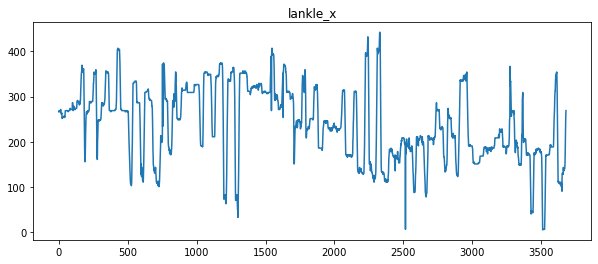

In [17]:
# Looking at hip position before smoothing
aux = data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].shape[0]
print(f'Number of frames for this video is {aux}')
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].reset_index(drop=True))
plt.title("nose_x")
plt.show()
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "lankle_x"].reset_index(drop=True))
plt.title("lankle_x")
plt.show()


In [18]:
clip_names = list(data["clip_name"].unique())
print(clip_names)

['1p_Artur_05122021_chreo1', '1p_Earl_05122021_choreo1_flipped_lr', '1p_Eero_1_05122021_choreo1', '1p_Eero_4_05122021_choreo1', '1p_Eero_6_05122021_choreo1', '1p_Eero_7_05122021_choreo1', '1p_Dirk_choreo1_04.12.2021', '1p_Heidi_07122021_choreo1_-turns', '1P-Person1-whole', '1p_Raquelinha_05122021_choreo1', '1p_sarah_salsa_basics_choreo1', '1p_Stef_2_05122021_Choreo1']


In [20]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Reduce the jitter with Smoothing
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
from scipy.signal import savgol_filter
import numpy as np
np.set_printoptions(precision=2)  # For compact display.
#df = data_1p.copy()
window_length = 9
polyorder = 2


#for i in range(3,54): df.iloc[:,i] = signal.savgol_filter(df.iloc[:,i],
#                                                       window_length,
#                                                     polyorder,
#                                                       mode='nearest'
#                                                     )


for i in clip_names:
    for j in cols:
        data.loc[ data["clip_name"] == i, j] = savgol_filter(
            data.loc[ data["clip_name"] == i, j],
            window_length,
            polyorder,
            mode='nearest')



Number of frames for this video is 3680


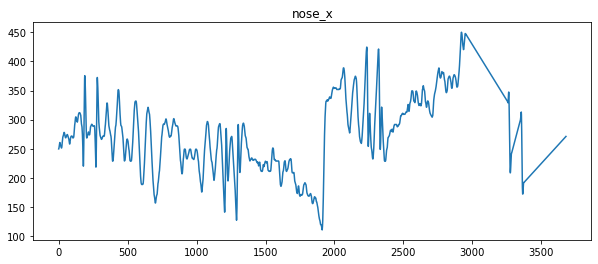

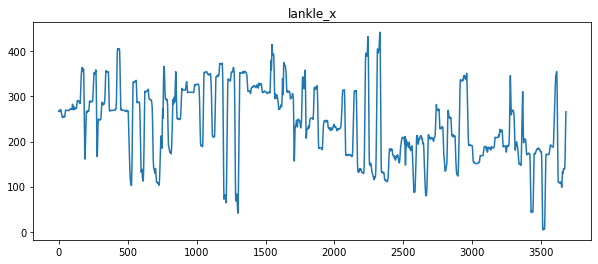

In [21]:
# Looking at hip position after smoothing
aux = data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].shape[0]
print(f'Number of frames for this video is {aux}')
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].reset_index(drop=True))
plt.title("nose_x")
plt.show()
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "lankle_x"].reset_index(drop=True))
plt.title("lankle_x")
plt.show()



In [23]:
data.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
44447,1p_Stef_2_05122021_Choreo1,3708,0.0,198.403048,305.460935,238.872506,348.967247,251.756312,348.155242,266.183619,...,0.898602,0.796509,0.799244,0.720383,0.325526,0.323599,0.373564,suzie-q,NaN,479
44448,1p_Stef_2_05122021_Choreo1,3709,0.0,201.661489,307.188134,242.746792,348.391000,250.832909,347.723753,261.199078,...,0.937453,0.602083,0.599544,0.725530,0.616891,0.591275,0.367217,suzie-q,NaN,479
44449,1p_Stef_2_05122021_Choreo1,3710,0.0,204.822065,307.873667,246.133286,347.752957,249.605225,347.135229,258.250000,...,0.958437,0.708810,0.654566,0.761363,0.845238,0.790193,0.405285,suzie-q,NaN,479
44450,1p_Stef_2_05122021_Choreo1,3711,0.0,207.240883,308.412385,248.305255,347.180013,249.071900,346.726498,256.531827,...,0.973175,0.708356,0.714142,0.680468,0.840614,0.726000,0.722980,suzie-q,NaN,479
44451,1p_Stef_2_05122021_Choreo1,3712,0.0,208.950524,308.749866,249.196242,346.766100,248.857861,346.564468,256.776567,...,0.973770,0.803625,0.826172,0.803299,0.814626,0.701920,0.751281,suzie-q,E,479


## Normalization

Normalization is applied calculating the min max of all coordinates (all columns) of sub data frame corresponding to a clip video

In [25]:
def normalize(array):
    max_value = np.max(array)
    min_value = np.min(array)
    diff = max_value - min_value
    normalized = (array - min_value) / diff
    return normalized 

for i in clip_names:
     data.loc[ data["clip_name"] == i, cols] = normalize(data.loc[ data["clip_name"] == i, cols])


Number of frames for this video is 3680


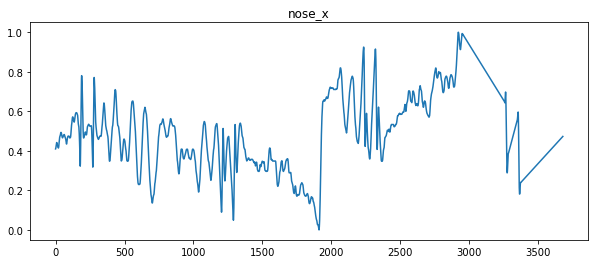

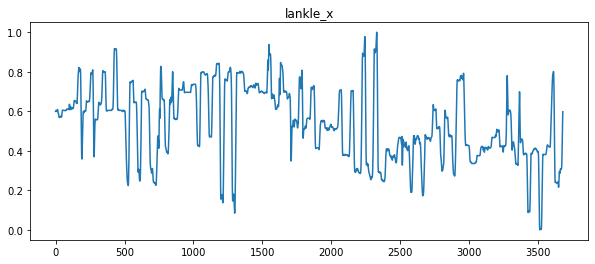

In [26]:
# Looking at data after normalization
aux = data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].shape[0]
print(f'Number of frames for this video is {aux}')
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "nose_x"].reset_index(drop=True))
plt.title("nose_x")
plt.show()
plt.figure(figsize=(10,4))
plt.plot(data.loc[ data["clip_name"] == "1p_Artur_05122021_chreo1", "lankle_x"].reset_index(drop=True))
plt.title("lankle_x")
plt.show()

In [28]:
data.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
44447,1p_Stef_2_05122021_Choreo1,3708,0.0,0.400162,0.755809,0.620831,0.511770,0.632532,0.476160,0.663900,...,0.898602,0.796509,0.799244,0.720383,0.325526,0.323599,0.373564,suzie-q,NaN,479
44448,1p_Stef_2_05122021_Choreo1,3709,0.0,0.415368,0.794172,0.641509,0.498219,0.628240,0.466355,0.645324,...,0.937453,0.602083,0.599544,0.725530,0.616891,0.591275,0.367217,suzie-q,NaN,479
44449,1p_Stef_2_05122021_Choreo1,3710,0.0,0.430118,0.809398,0.659584,0.483216,0.622533,0.452982,0.634334,...,0.958437,0.708810,0.654566,0.761363,0.845238,0.790193,0.405285,suzie-q,NaN,479
44450,1p_Stef_2_05122021_Choreo1,3711,0.0,0.441405,0.821363,0.671176,0.469744,0.620054,0.443694,0.627930,...,0.973175,0.708356,0.714142,0.680468,0.840614,0.726000,0.722980,suzie-q,NaN,479
44451,1p_Stef_2_05122021_Choreo1,3712,0.0,0.449384,0.828859,0.675932,0.460011,0.619059,0.440013,0.628842,...,0.973770,0.803625,0.826172,0.803299,0.814626,0.701920,0.751281,suzie-q,E,479


In [8]:
# Extract 5 sub sets for every figure

data_b = data.loc[data['label'] == 'basic', :].reset_index(drop=True)
data_s = data.loc[data['label'] == 'side', :].reset_index(drop=True)
data_r = data.loc[data['label'] == 'right-turn', :].reset_index(drop=True)
data_c = data.loc[data['label'] == 'cuban-basic', :].reset_index(drop=True)
data_q = data.loc[data['label'] == 'suzie-q', :].reset_index(drop=True)

In [9]:
data_c

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Artur_05122021_chreo1,759,0.0,249.043000,211.226000,236.424,286.560,166.081,276.576,120.976,...,0.851842,0.318418,0.000000,0.187400,0.779005,0.779744,0.537454,cuban-basic,S,6
1,1p_Artur_05122021_chreo1,760,0.0,248.892000,211.298000,233.989,286.548,166.159,276.579,125.949,...,0.828728,0.238557,0.000000,0.187114,0.787122,0.800840,0.573594,cuban-basic,NaN,6
2,1p_Artur_05122021_chreo1,761,0.0,246.439000,211.263000,233.916,286.541,166.166,276.551,126.019,...,0.841918,0.206451,0.172404,0.220781,0.775451,0.802431,0.581920,cuban-basic,NaN,6
3,1p_Artur_05122021_chreo1,762,0.0,243.978000,208.919000,231.504,286.538,166.124,276.578,125.963,...,0.865535,0.102312,0.000000,0.314184,0.772364,0.803984,0.588926,cuban-basic,NaN,6
4,1p_Artur_05122021_chreo1,763,0.0,241.434000,208.819000,231.312,286.518,163.574,279.091,123.469,...,0.879454,0.332751,0.342306,0.601903,0.764337,0.797000,0.605672,cuban-basic,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,1p_Stef_2_05122021_Choreo1,3535,0.0,165.832245,302.077770,211.349,349.342,254.057,349.349,286.580,...,0.896388,0.491088,0.559604,0.836254,0.614912,0.612373,0.860626,cuban-basic,NaN,477
8490,1p_Stef_2_05122021_Choreo1,3536,0.0,165.850058,302.042122,211.343,349.344,254.037,349.367,286.594,...,0.889378,0.478086,0.549290,0.834863,0.606746,0.600384,0.853764,cuban-basic,NaN,477
8491,1p_Stef_2_05122021_Choreo1,3537,0.0,165.867871,302.006475,211.315,349.358,254.001,349.400,286.591,...,0.900101,0.476371,0.549917,0.843898,0.612489,0.605153,0.852801,cuban-basic,NaN,477
8492,1p_Stef_2_05122021_Choreo1,3538,0.0,165.885683,301.970827,211.301,349.383,253.984,349.434,286.516,...,0.888552,0.474647,0.546771,0.837624,0.590606,0.580879,0.869726,cuban-basic,NaN,477


In [31]:
# No missing frames in any of the subsets

data_b.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [32]:
data_s.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [33]:
data_r.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [34]:
data_q.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [35]:
data_c.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [36]:
check = data_c.loc[ data_c['figure_id'] == 6 ,'lankle_y']

Text(0.5, 1.0, 'Cuban basic')

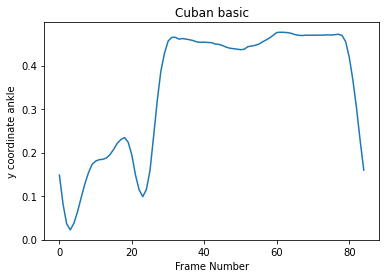

In [37]:
plt.plot(np.array(check).reshape(check.shape[0], 1))
plt.xlabel("Frame Number")
plt.ylabel("y coordinate ankle")
plt.title("Cuban basic")

Text(0.5, 1.0, 'Cuban basic')

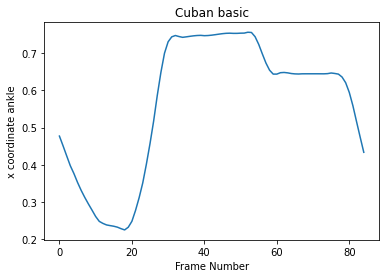

In [38]:
check = data_c.loc[ data_c['figure_id'] == 6 ,'lankle_x']
plt.plot(np.array(check).reshape(check.shape[0], 1))
plt.xlabel("Frame Number")
plt.ylabel("x coordinate ankle")
plt.title("Cuban basic")

In [39]:
# Shiffling rows with same ID
# TODO, how to specify the seed in the function random.choice?

test_perm = pd.concat((data_c[data_c['figure_id'] == i] for i in np.random.choice(
                                                         data_c['figure_id'].unique(),
                                                         data_c['figure_id'].nunique())
          ))

In [10]:
import random
random.seed(42)

l_c = list(data_c['figure_id'].unique())
random.shuffle(l_c)
l_b = list(data_b['figure_id'].unique())
random.shuffle(l_b)
l_r = list(data_r['figure_id'].unique())
random.shuffle(l_r)
l_s = list(data_s['figure_id'].unique())
random.shuffle(l_s)
l_q = list(data_q['figure_id'].unique())
random.shuffle(l_q)

data_c = pd.concat((data_c[data_c['figure_id'] == i] for i in l_c
          )).reset_index(drop=True)
data_b = pd.concat((data_b[data_b['figure_id'] == i] for i in l_b
          )).reset_index(drop=True)
data_r = pd.concat((data_r[data_r['figure_id'] == i] for i in l_r
          )).reset_index(drop=True)
data_s = pd.concat((data_s[data_s['figure_id'] == i] for i in l_s
          )).reset_index(drop=True)
data_q = pd.concat((data_q[data_q['figure_id'] == i] for i in l_q
          )).reset_index(drop=True)


In [11]:
data_q

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Raquelinha_05122021_choreo1,1420,0.0,131.039,93.4908,211.528,213.890,148.671,223.925,148.563,...,0.755632,0.770250,0.783893,0.659919,0.681811,0.674699,0.798248,suzie-q,S,378
1,1p_Raquelinha_05122021_choreo1,1421,0.0,131.073,98.3845,213.968,213.986,151.118,226.391,148.747,...,0.700091,0.769080,0.780626,0.633334,0.691108,0.686425,0.798558,suzie-q,NaN,378
2,1p_Raquelinha_05122021_choreo1,1422,0.0,131.055,98.4085,216.405,214.016,151.224,226.419,151.286,...,0.672855,0.789149,0.789339,0.665137,0.774553,0.730718,0.806490,suzie-q,NaN,378
3,1p_Raquelinha_05122021_choreo1,1423,0.0,131.019,98.4254,214.016,213.952,151.293,221.465,161.199,...,0.686806,0.808400,0.812262,0.688584,0.750617,0.693004,0.784652,suzie-q,NaN,378
4,1p_Raquelinha_05122021_choreo1,1424,0.0,128.642,95.9452,213.903,213.992,151.220,223.918,151.272,...,0.759413,0.821367,0.816540,0.716183,0.720728,0.685460,0.796869,suzie-q,NaN,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1p_Raquelinha_05122021_choreo1,2269,0.0,432.328,108.3900,352.130,211.346,347.042,213.899,339.495,...,0.000000,0.682014,0.670165,0.469927,0.674402,0.694665,0.729064,suzie-q,NaN,389
8448,1p_Raquelinha_05122021_choreo1,2270,0.0,432.443,105.9380,357.026,208.843,351.933,211.388,339.430,...,0.000000,0.728751,0.640073,0.634482,0.596535,0.587244,0.720361,suzie-q,NaN,389
8449,1p_Raquelinha_05122021_choreo1,2271,0.0,434.970,105.9100,364.528,201.406,352.138,206.336,336.951,...,0.000000,0.760110,0.650840,0.685596,0.533622,0.584405,0.721063,suzie-q,NaN,389
8450,1p_Raquelinha_05122021_choreo1,2272,0.0,444.918,98.4753,367.096,193.912,364.542,198.883,336.929,...,0.000000,0.750161,0.645685,0.685350,0.536541,0.549056,0.717695,suzie-q,NaN,389


In [12]:
# Checking number of figures and for average number of frames
# TODO why the splitting does not give always the same numbers
ind = data_b.columns.get_loc("label")
n_frame = data_b['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n_frame}')
print(f'Number of instances is {n_frame}')

ind = data_c.columns.get_loc("label")
n_frame = data_c['figure_id'].unique().shape[0]
print(f'Number of frames {data_c.iloc[0, ind]} is {data_c.shape[0]/n_frame}')
print(f'Number of instances is {n_frame}')

ind = data_r.columns.get_loc("label")
n_frame = data_r['figure_id'].unique().shape[0]
print(f'Number of frames {data_r.iloc[0, ind]} is {data_r.shape[0]/n_frame}')
print(f'Number of instances is {n_frame}')

ind = data_b.columns.get_loc("label")
n_frame = data_b['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n_frame}')
print(f'Number of instances is {n_frame}')

ind = data_s.columns.get_loc("label")
n_frame = data_s['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n_frame}')
print(f'Number of instances is {n_frame}')



Number of frames basic is 102.71875
Number of instances is 96
Number of frames cuban-basic is 88.47916666666667
Number of instances is 96
Number of frames right-turn is 95.60416666666667
Number of instances is 96
Number of frames basic is 102.71875
Number of instances is 96
Number of frames basic is 102.71875
Number of instances is 96


In [15]:
# Splitting every set

def get_split_index(ind_list):
    
    split_at = np.floor(0.8 * len(ind_list)).astype(int)
    s_index = ind_list[split_at]
    
    return s_index


In [16]:
end_b = data_b[data_b['status'] == "E"].index.tolist()
end_s = data_s[data_s['status'] == "E"].index.tolist()
end_q = data_q[data_q['status'] == "E"].index.tolist()
end_c = data_c[data_c['status'] == "E"].index.tolist()
end_r = data_r[data_r['status'] == "E"].index.tolist()

train_set = pd.concat([
    data_b.loc[0:get_split_index(end_b), :],
    data_s.loc[0:get_split_index(end_s), :],
    data_q.loc[0:get_split_index(end_q), :],
    data_c.loc[0:get_split_index(end_c), :],
    data_r.loc[0:get_split_index(end_r), :]
]).reset_index(drop=True)

val_set = pd.concat([
    data_b.loc[get_split_index(end_b) + 1 :, :],
    data_s.loc[get_split_index(end_s) + 1 :, :],
    data_q.loc[get_split_index(end_q) + 1 :, :],
    data_c.loc[get_split_index(end_c) + 1 :, :],
    data_r.loc[get_split_index(end_r) + 1 :, :]
]).reset_index(drop=True)




In [87]:
train_set.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
35917,1p_Raquelinha_05122021_choreo1,1150,0.0,0.368124,0.238937,0.579055,0.331586,0.458902,0.398520,0.435883,...,0.626070,0.118908,0.225104,0.615143,0.681235,0.602938,0.708253,right-turn,NaN,373
35918,1p_Raquelinha_05122021_choreo1,1151,0.0,0.349522,0.238752,0.551927,0.330623,0.437454,0.384876,0.419813,...,0.657589,0.453001,0.469065,0.544748,0.702531,0.621746,0.720601,right-turn,NaN,373
35919,1p_Raquelinha_05122021_choreo1,1152,0.0,0.328244,0.241111,0.531305,0.338267,0.429213,0.373049,0.426556,...,0.633111,0.482225,0.542154,0.514200,0.699267,0.626162,0.730300,right-turn,NaN,373
35920,1p_Raquelinha_05122021_choreo1,1153,0.0,0.310600,0.242025,0.509489,0.327679,0.428650,0.348569,0.416107,...,0.625895,0.559149,0.542130,0.502527,0.698190,0.625318,0.702042,right-turn,NaN,373
35921,1p_Raquelinha_05122021_choreo1,1154,0.0,0.288595,0.242079,0.490224,0.340383,0.440824,0.352257,0.420580,...,0.640491,0.578884,0.552990,0.504181,0.598317,0.543841,0.738047,right-turn,E,373


In [88]:
val_set.head()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Dirk_choreo1_04.12.2021,3086,0.0,0.864116,0.427472,0.578582,0.593984,0.496780,0.673016,0.620344,...,0.0,0.168051,0.180995,0.302444,0.387506,0.420408,0.441530,basic,S,270
1,1p_Dirk_choreo1_04.12.2021,3087,0.0,0.865322,0.438276,0.579095,0.600624,0.511263,0.686299,0.612007,...,0.0,0.198988,0.205758,0.346006,0.415687,0.465465,0.543115,basic,NaN,270
2,1p_Dirk_choreo1_04.12.2021,3088,0.0,0.866275,0.427481,0.577445,0.597670,0.531067,0.690994,0.610243,...,0.0,0.198898,0.205743,0.341794,0.411772,0.451415,0.535021,basic,NaN,270
3,1p_Dirk_choreo1_04.12.2021,3089,0.0,0.868295,0.425925,0.581423,0.592945,0.550504,0.685982,0.614962,...,0.0,0.143873,0.000000,0.313104,0.290851,0.339730,0.514811,basic,NaN,270
4,1p_Dirk_choreo1_04.12.2021,3090,0.0,0.870971,0.420965,0.589993,0.579142,0.571732,0.677014,0.623663,...,0.0,0.143871,0.000000,0.328998,0.287141,0.332843,0.488416,basic,NaN,270


In [17]:
train_set.to_csv("Data_train_validate/Data_train_nonorm.csv")
val_set.to_csv("Data_train_validate/Data_val_nonorm.csv")

## Analysis of meaning of "0" coordinates

In [22]:
# load one of the persons videos

ex_video = data.loc[data["clip_name"] == "1P-Person1-whole", :].reset_index(drop=True)

In [23]:
ex_video.head()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1P-Person1-whole,61,0.0,151.095,429.813,151.295,490.188,108.553,490.030,50.8457,...,0.892251,0.774924,0.788209,0.750216,0.139906,0.000000,0.327159,basic,S,320
1,1P-Person1-whole,62,0.0,151.049,429.765,151.278,490.237,108.537,490.046,53.3289,...,0.905084,0.757642,0.747180,0.746240,0.136440,0.000000,0.320594,basic,NaN,320
2,1P-Person1-whole,63,0.0,148.682,429.753,151.113,490.243,108.412,490.089,53.2632,...,0.922131,0.804929,0.780747,0.738512,0.168895,0.213050,0.311109,basic,NaN,320
3,1P-Person1-whole,64,0.0,148.634,429.766,151.068,492.544,105.997,490.168,50.6537,...,0.918574,0.788258,0.778377,0.724938,0.224777,0.265526,0.329694,basic,NaN,320
4,1P-Person1-whole,65,0.0,148.607,429.773,151.054,492.535,105.994,490.180,50.7747,...,0.928445,0.766663,0.749715,0.704378,0.295609,0.343239,0.365627,basic,NaN,320


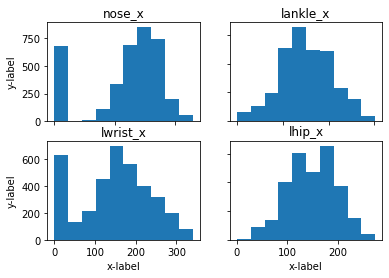

In [30]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(ex_video["nose_x"])
axs[0, 0].set_title('nose_x')
axs[0, 1].hist(ex_video["lankle_x"])
axs[0, 1].set_title('lankle_x')
axs[1, 0].hist(ex_video["lwrist_x"])
axs[1, 0].set_title('lwrist_x')
axs[1, 1].hist(ex_video["lhip_x"])
axs[1, 1].set_title('lhip_x')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [43]:
ex_video.loc[ex_video["nose_x"] == 0, "frame_nr"]

178      239
179      240
180      241
181      242
262      323
        ... 
3671    3732
3672    3733
3673    3734
3674    3735
3675    3736
Name: frame_nr, Length: 679, dtype: int64

In [42]:
# lankle_x at the same frame is missing because is out of the picture 
ex_video.loc[3518, "lankle_v"]

0.0

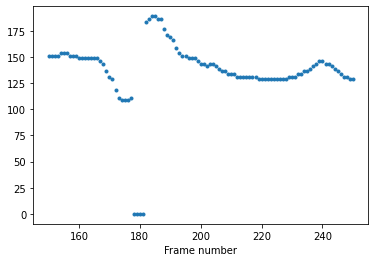

In [45]:
plt.plot(ex_video.loc[150: 250, "nose_x"], ".")
plt.xlabel("Frame number")
plt.show()